# Food Stamps Application Analysis

Sergio Nieto

_Analysis of the likelihood of using food stamps using the information from the PUMS datasets._

## Initial Objectives

1. If the data is too large for the analysis, what will you do to reduce the size of the data, or work with the full dataset? 
2. What is the incidence rate?  Are there enough records for you to build a model? If not, what steps will you take to ensure you can attempt a model with this data.
3. What data makes sense to use as potential features for a model, and which data does not?
4. What data cleansing techniques did you use and why?
5. Prepare your data for model development, explaining the steps you used for that preparation.
6. Make sure to document all the steps you used for building the model(s).
7. Include any relevant metrics that you use to determine if the model is acceptable or not. 
8. Be ready to defend your results. It is fine if you cannot build a model that will successfully predict the likelihood of using food stamps. You just need to be able to explain why that is the case.
9. If you do successfully build a model, test the results on another state, like Texas or California.  Download the data for the appropriate state from https://www2.census.gov/programs-surveys/acs/data/pums/2021/1-Year/.  csv_pca.zip is California, and csv_ptx.zip is Texas.

Dataset is not too large, maybe after merging with more states and more census year info. There are options:

- Use a Database like postgresql or another to kickoff exploratory analysis.
- If not all data is needed at once, it is possible to use chunks of data only agregating when necessary.
- Sometimes, when you know a priori charactericstics of the dataset you can do: load useful columns only, change datatypes (truncating), use sparse representation if too many null values are to be stored.
- Usually recurring to a cloud provider of a database maybe an option.

## Data-Business Understanding

Taking introductory information from documentation:

The Public Use Microdata Sample (PUMS) are a subset of the 2021 American Community Survey (ACS) and Puerto Rico Community Survey (PRCS) samples.

The Census Bureau takes further steps to prevent the identification of specific individuals, households, or housing units, on the PUMS files. The main disclosure avoidance method used is to limit the geographic detail shown in the files. The smallest geographic unit that is identi- fied is the Public Use Microdata Area (PUMA). The current PUMAs were formed based on data and location collected in the 2010 Census and have been used by the ACS PUMS files since the 2012 data year. They do not cross state boundaries.

There are 2 main datasets by State: Housing unit related and Person related. We refer to them as Housing dataset and Population dataset just for simplicity.

Only Population data was provided but the Yearly food stamp/Supplemental Nutrition Assistance Program (SNAP) recipiency variable was available in the Housing dataset so both will be used in the analysis.

In [6]:
import pandas as pd
import seaborn as sns

pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('psam_p05.csv')

In [15]:
dfh = pd.read_csv('psam_house05.csv')

In [82]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15208 entries, 0 to 15207
Columns: 241 entries, RT to WGTP80
dtypes: float64(149), int64(90), object(2)
memory usage: 28.0+ MB


In [75]:
dfh.shape, df.shape

((15208, 241), (30050, 287))

In [17]:
dfh.head(3)

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,TYPEHUGQ,ACCESSINET,ACR,AGS,BATH,BDSP,BLD,BROADBND,COMPOTHX,CONP,DIALUP,ELEFP,ELEP,FS,FULFP,FULP,GASFP,GASP,HFL,HISPEED,HOTWAT,INSP,LAPTOP,MHP,MRGI,MRGP,MRGT,MRGX,OTHSVCEX,REFR,RMSP,RNTM,RNTP,RWAT,RWATPR,SATELLITE,SINK,SMARTPHONE,SMP,STOV,TABLET,TEL,TEN,VACDUR,VACOTH,VACS,VALP,VEH,WATFP,WATP,YRBLT,CPLT,FINCP,FPARC,GRNTP,GRPIP,HHL,HHLANP,HHLDRAGEP,HHLDRHISP,HHLDRRAC1P,HHT,HHT2,HINCP,HUGCL,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MULTG,MV,NOC,NPF,NPP,NR,NRC,OCPIP,PARTNER,PLM,PLMPRP,PSF,R18,R60,R65,RESMODE,SMOCP,SMX,SRNT,SVAL,TAXAMT,WIF,WKEXREL,WORKSTAT,FACCESSP,FACRP,FAGSP,FBATHP,FBDSP,FBLDP,FBROADBNDP,FCOMPOTHXP,FCONP,FDIALUPP,FELEP,FFINCP,FFSP,FFULP,FGASP,FGRNTP,FHFLP,FHINCP,FHISPEEDP,FHOTWATP,FINSP,FKITP,FLAPTOPP,FMHP,FMRGIP,FMRGP,FMRGTP,FMRGXP,FMVP,FOTHSVCEXP,FPLMP,FPLMPRP,FREFRP,FRMSP,FRNTMP,FRNTP,FRWATP,FRWATPRP,FSATELLITEP,FSINKP,FSMARTPHONP,FSMOCP,FSMP,FSMXHP,FSMXSP,FSTOVP,FTABLETP,FTAXP,FTELP,FTENP,FVACDURP,FVACOTHP,FVACSP,FVALP,FVEHP,FWATP,FYRBLTP,WGTP1,WGTP2,WGTP3,WGTP4,WGTP5,WGTP6,WGTP7,WGTP8,WGTP9,WGTP10,WGTP11,WGTP12,WGTP13,WGTP14,WGTP15,WGTP16,WGTP17,WGTP18,WGTP19,WGTP20,WGTP21,WGTP22,WGTP23,WGTP24,WGTP25,WGTP26,WGTP27,WGTP28,WGTP29,WGTP30,WGTP31,WGTP32,WGTP33,WGTP34,WGTP35,WGTP36,WGTP37,WGTP38,WGTP39,WGTP40,WGTP41,WGTP42,WGTP43,WGTP44,WGTP45,WGTP46,WGTP47,WGTP48,WGTP49,WGTP50,WGTP51,WGTP52,WGTP53,WGTP54,WGTP55,WGTP56,WGTP57,WGTP58,WGTP59,WGTP60,WGTP61,WGTP62,WGTP63,WGTP64,WGTP65,WGTP66,WGTP67,WGTP68,WGTP69,WGTP70,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
0,H,2021GQ0000060,7,700,3,5,1000000,1029928,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,H,2021GQ0000334,7,1900,3,5,1000000,1029928,0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,H,2021GQ0000904,7,1100,3,5,1000000,1029928,0,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


A quick look at datasets shows that information has null values, encoded values and needs to be weighted before aggregating.

In the Population dataset we have repeated ids that correspond to different values in the SPORDER variable. This variable encodes the number of person within a house unit, so I'll use only sporder=1 to refer to the first contributor in the housing unit, this is only to simplify analysis.

In [78]:
df[df['SERIALNO']== '2021HU0811808']

,RT,SERIALNO,DIVISION,SPORDER,PUMA,REGION,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,COW,DDRS,DEAR,DEYE,DOUT,DPHY,DRAT,DRATX,DREM,ENG,FER,GCL,GCM,GCR,HIMRKS,HINS1,HINS2,HINS3,HINS4,HINS5,HINS6,HINS7,INTP,JWMNP,JWRIP,JWTRNS,LANX,MAR,MARHD,MARHM,MARHT,MARHW,MARHYP,MIG,MIL,MLPA,MLPB,MLPCD,MLPE,MLPFG,MLPH,MLPIK,MLPJ,NWAB,NWAV,NWLA,NWLK,NWRE,OIP,PAP,RELSHIPP,RETP,SCH,SCHG,SCHL,SEMP,SEX,SSIP,SSP,WAGP,WKHP,WKL,WKWN,WRK,YOEP,ANC,ANC1P,ANC2P,DECADE,DIS,DRIVESP,ESP,ESR,FOD1P,FOD2P,HICOV,HISP,INDP,JWAP,JWDP,LANP,MIGPUMA,MIGSP,MSP,NAICSP,NATIVITY,NOP,OC,OCCP,PAOC,PERNP,PINCP,POBP,POVPIP,POWPUMA,POWSP,PRIVCOV,PUBCOV,QTRBIR,RAC1P,RAC2P,RAC3P,RACAIAN,RACASN,RACBLK,RACNH,RACNUM,RACPI,RACSOR,RACWHT,RC,SCIENGP,SCIENGRLP,SFN,SFR,SOCP,VPS,WAOB,FAGEP,FANCP,FCITP,FCITWP,FCOWP,FDDRSP,FDEARP,FDEYEP,FDISP,FDOUTP,FDPHYP,FDRATP,FDRATXP,FDREMP,FENGP,FESRP,FFERP,FFODP,FGCLP,FGCMP,FGCRP,FHICOVP,FHIMRKSP,FHINS1P,FHINS2P,FHINS3C,FHINS3P,FHINS4C,FHINS4P,FHINS5C,FHINS5P,FHINS6P,FHINS7P,FHISP,FINDP,FINTP,FJWDP,FJWMNP,FJWRIP,FJWTRNSP,FLANP,FLANXP,FMARP,FMARHDP,FMARHMP,FMARHTP,FMARHWP,FMARHYP,FMIGP,FMIGSP,FMILPP,FMILSP,FOCCP,FOIP,FPAP,FPERNP,FPINCP,FPOBP,FPOWSP,FPRIVCOVP,FPUBCOVP,FRACP,FRELSHIPP,FRETP,FSCHGP,FSCHLP,FSCHP,FSEMP,FSEXP,FSSIP,FSSP,FWAGP,FWKHP,FWKLP,FWKWNP,FWRKP,FYOEP,PWGTP1,PWGTP2,PWGTP3,PWGTP4,PWGTP5,PWGTP6,PWGTP7,PWGTP8,PWGTP9,PWGTP10,PWGTP11,PWGTP12,PWGTP13,PWGTP14,PWGTP15,PWGTP16,PWGTP17,PWGTP18,PWGTP19,PWGTP20,PWGTP21,PWGTP22,PWGTP23,PWGTP24,PWGTP25,PWGTP26,PWGTP27,PWGTP28,PWGTP29,PWGTP30,PWGTP31,PWGTP32,PWGTP33,PWGTP34,PWGTP35,PWGTP36,PWGTP37,PWGTP38,PWGTP39,PWGTP40,PWGTP41,PWGTP42,PWGTP43,PWGTP44,PWGTP45,PWGTP46,PWGTP47,PWGTP48,PWGTP49,PWGTP50,PWGTP51,PWGTP52,PWGTP53,PWGTP54,PWGTP55,PWGTP56,PWGTP57,PWGTP58,PWGTP59,PWGTP60,PWGTP61,PWGTP62,PWGTP63,PWGTP64,PWGTP65,PWGTP66,PWGTP67,PWGTP68,PWGTP69,PWGTP70,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
17706,P,2021HU0811808,7,1,100,3,5,1029928,57,52,1,NaN,1.0,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,2.0,0,1,2,2,2,2,2,2,30.0,NaN,NaN,11.0,2.0,2,2.0,2.0,1.0,1.0,1992.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.0,3.0,0.0,0.0,20,0.0,1.0,NaN,22.0,20000.0,1,0.0,0.0,135000.0,48.0,1.0,52.0,1.0,NaN,2,22,32,NaN,2,NaN,NaN,1.0,6200.0,6201.0,1,1,6695.0,NaN,NaN,NaN,NaN,NaN,3.0,5182,1,NaN,0.0,110.0,NaN,155000.0,155030.0,49,497.0,100.0,5.0,1,2,4,1,1,1,0,0,0,0,1,0,0,1,0.0,2.0,2.0,NaN,NaN,113021,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,51,22,93,56,104,90,50,90,19,65,54,60,16,53,88,52,19,18,70,65,64,16,101,62,89,92,57,87,15,61,65,62,17,56,84,56,18,16,50,65,61,19,96,57,105,102,49,105,16,53,51,56,18,64,97,55,15,17,60,52,52,18,100,52,98,93,72,104,20,61,58,68,15,50,95,53,21,15,59
17707,P,2021HU0811808,7,2,100,3,5,1029928,90,22,1,NaN,NaN,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,0,1,2,2,2,2,2,2,0.0,NaN,NaN,NaN,2.0,1,2.0,2.0,1.0,2.0,2017.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,2.0,2.0,3.0,0.0,0.0,25,0.0,1.0,NaN,19.0,0.0,2,0.0,0.0,0.0,NaN,3.0,NaN,2.0,NaN,2,22,32,NaN,2,NaN,NaN,6.0,NaN,NaN,1,1,NaN,NaN,NaN,NaN,100.0,5.0,1.0,NaN,1,NaN,0.0,NaN,1.0,0.0,0.0,49,497.0,NaN,NaN,1,2,4,1,1,1,0,0,0,0,1,0,0,1,0.0,NaN,NaN,1.0,2.0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,101,22,155,75,129,155,112,155,30,79,93,103,28,90,129,67,25,27,97,110,107,26,164,105,150,128,104,160,29,74,87,104,28,105,155,72,26,26,99,139,90,27,173,84,131,162,93,171,26,95,83,88,28,93,132,88,26,25,107,83,82,30,178,85,131,138,113,166,24,97,100,92,22,86,165,94,24,22,89
17708,P,2021HU0811808,7,3,100,3,5,1029928,81,17,1,NaN,1.0,2.0,2,2,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,0,1,2,2,2,2,2,2,0.0,NaN,NaN,NaN,2.0,5,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,2.0,3.0,3.0,0.0,0.0,25,0.0,3.0,15.0,17.0,0.0,1,0.0,0.0,3000.0,20.0,1.0,8.0,2.0,NaN,2,22,32,NaN

In [83]:
df = df[df['SPORDER'] ==1].reset_index(drop=True)

### Food Stamp incidence rate

It's possible to calculate incidence rate for recepiency of SNAP. According to documentation, the variable is called FS and FS=1 are those housing units that receive the benefits of the program (there are null values meaning the application is vacant).

> We have 10.77% of the housing units receive the benefits.

In [92]:
dfh.loc[dfh['FS']==2, 'FS'] = 0

# No need to do this...

In [93]:
dfh['FS'].value_counts(normalize=True)

0.0    0.892251
1.0    0.107749
Name: FS, dtype: float64

In [90]:
# Removing from the Housing dataset those units without FS value.

dfh = dfh[~dfh['FS'].isnull()].reset_index(drop=True)

## Data Preprocessing

In [91]:
# We need to know if there are shared ids:

dfh['SERIALNO'].isin(df['SERIALNO']).sum(), df['SERIALNO'].isin(dfh['SERIALNO']).sum()

(13615, 13615)

Understanding the datasets variables is crucial for reducing the number of variables before looking into correlations.

- Droping RT, Division, Region, ST because we have the PUMA.

### RECORD-HOUSING UNIT VARIABLES 

Some housing variables are binary and related to availability of certain characteristics of the house like internet or water mgmt.

I'll keep almost all variables, droping only those that may imply same capabilities for the household in the unit. 

For example, DIALUP is related to a Dial-up service access to internet in the region, so it may not be a good explicative variable because in other states will change just because geography and different infrastructure. It may be better to use internet access only or a varible related to the usage of internet, like a home business.

In [110]:
dfh['DIALUP'].value_counts()

2.0    10066
1.0      288
Name: DIALUP, dtype: int64

In [106]:
dfh.groupby(['DIALUP'])['FS'].sum().reset_index().sort_values('FS', ascending=False)

,DIALUP,FS
1,2.0,1057.0
0,1.0,24.0


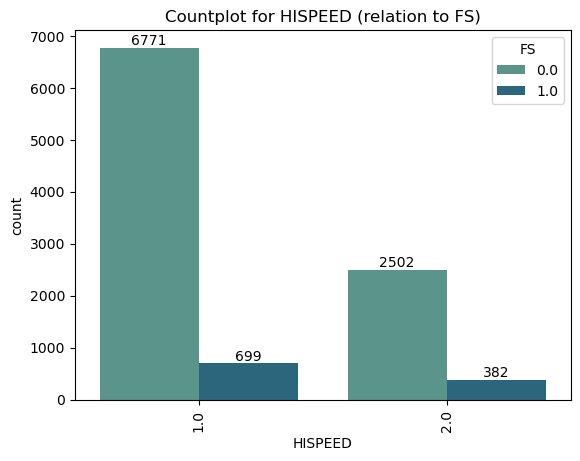

In [114]:
# A variable related to internet but more related to income possibilities is HISPEED

# Broadband (high speed) Internet service such as cable, fiber optic, or  DSL service. 

# HISPEED=1 means the housing unit has acces to this service.

p = 'crest'
ax = sns.countplot(data=dfh, 
                   x='HISPEED',
                   hue="FS", 
                   palette=p, 
                   order=dfh['HISPEED'].value_counts().index)
ax.set_title('Countplot for HISPEED (relation to FS)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for container in ax.containers:
    ax.bar_label(container)

### RECORD-HOUSEHOLD VARIABLES 

This variales include income and family characteristics that may become relevant for the analysis. Some of them will be droped like race related (to avoid bias in the possible model) but I'll keep one language variable to account for a possible relationship.

Theres is also the problem of weighting the values like income according to the size of the sample in the survey. According to documentation:

_Each housing and person record is assigned a weight, because the records in the PUMS files represent a sam- ple of the population. The weight is a numeric variable expressing the number of housing units or people that an individual microdata record represents. The sum of the housing unit and person weights for a geographic area is equal to the estimate of the total number of housing units and people in that area. To generate estimates based on the PUMS records, data users must correctly apply weights._

_When working with a merged file that includes both housing and person records, person weights should be used to produce estimates for person characteristics..._

_There are two additional sets of weights, one for households ranging from WGTP1 to WGTP80, and one for individuals ranging from PWGTP1 to PWGTP80. These “replicate weights” are used to calculate the error associated with each estimate. For more informa- tion about replicate weights, see the section below on “Data Quality in the ACS PUMS.”
TIP: To generate statistics for housing units or house- holds (for example, data on average household income), data users should apply the PUMS household weights (WGTP). To generate statistics for individuals (such as age or educational attainment), data users should apply the PUMS person weights (PWGTP)._

I'll drop WGTP and PWGTP since they're related to error analysis.

In [136]:
pwgt_cols = list(df.columns)
hwgt_cols = list(dfh.columns)

In [150]:
p_to_drop = [x for x in pwgt_cols if ('WGTP' in x)]
h_to_drop = [x for x in hwgt_cols if ('WGTP' in x)]

In [151]:
# Only keeping the first member of the list
p_to_drop.remove('PWGTP')
h_to_drop.remove('WGTP')
p_to_drop[:3], h_to_drop[:3]

(['PWGTP1', 'PWGTP2', 'PWGTP3'], ['WGTP1', 'WGTP2', 'WGTP3'])

In [153]:
df.drop(columns = p_to_drop, inplace=True)
dfh.drop(columns = h_to_drop, inplace=True)